# Dinámica No Lineal
## Trabajos Prácticos: Oscilador Cuartico

El oscilador cuartico, definido por 

$$H(p,x) = \frac{p^{2}}{2} + \frac{x^{4}}{4}$$

admite como solucion

$$x(t) = x_{0}(h) \sum_{n=1}^{\infty} \alpha_{n} \cos \left( (2n-1)\sqrt{2}\beta h^{1/4}t \right),$$

donde

$$x_{0} = 4\beta h^{1/4}, \quad \beta = \frac{\pi}{2K(1/\sqrt{2})}, \quad \alpha_{n} = \frac{1}{\cosh ((n-1/2)\pi)},$$

y $h$ es el valor de la energia del oscilador.

#### Ejercicio 1:
Graficar el plano de fases del oscilador cuartico para diferentes valores de $h$

#### Resolución Ejercicio 1:
Para resolver esta parte del ejercicio vamos a recurrir nuevamente a las funcionalidades del lenguaje python, el cual nos permite en un mismo pedazo (o pedazos) de codigo, resolver funciones, integrarlas, encontrar series de tiempo y tambien graficar lo que necesitemos mostrar.

La primera cuestion que tenemos que notar aqui es que tenemos la expresion de las soluciones del oscilador cuartico en forma de una serie infinita. Intentaremos primero expresar esta funcion como una funcion de python que luego vamos a llamar para calcular sus trayectorias con distintos valores de la energia.

In [71]:
import numpy as np
import matplotlib.pyplot as plt

def oscilador_cuartico_aprox(h, t, n = 3):
    """
    Descripcion:
    esta funcion devuelve el valor de la coordenada
    para la aproximacion de las soluciones del oscilador
    cuartico.
    
    Parametros:
    ----------
    h: float,
        valor de la energia
    t: float,
        tiempo para el cual queremos la coordenada
    n: entero,
        define el orden de la aproximacion a usar para
        estimar el valor de x
    
    Retorna:
    -------
    x: float,
        coordenada para correspondiente al tiempo t, 
        para un valor de la energia h
    """
    
    from scipy import special
    
    # uno sobre la raiz de dos
    s = 1./np.sqrt(2.0)
    beta = np.pi/(2.0*special.ellipk(s))
    
    # calculamos el x0
    x_0 = 4.0*beta*np.sqrt(np.sqrt(h))
    
    # hacemos un lazo para calcular los terminos hasta n
    x = 0.0
    for i in range(1,n):
        alfa_n = 1.0/np.cosh((float(i)-0.5)*np.pi)
        x = x + alfa_n*np.cos((2*float(i)-1.0)*np.sqrt(2)*beta*np.sqrt(np.sqrt(h))*t)
        
    # multiplicamos por x0
    x = x_0*x
    
    return x

Intentemos obtener una trayectoria en el espacio de fases para un valor definido de la energia $h$.

In [72]:
# valor de la energia
h = 20
# aproximacion de la solucion
n = 5

# tiempo final de la trayectoria
tstop = 5*np.pi/2

# tiempo inicial
time = 0
tlist = [time]
# valores iniciales
x_ini = oscilador_cuartico_aprox(h,time, n=n)
xlist = [x_ini]
p_ini = np.sqrt(2.0*(h-x_ini**4/4.0))
plist = [p_ini]

# pasos de tiempo
deltat = np.pi/1000.0

while time < tstop:
    # para que termine justo en t = tstop
    delt = min(deltat, tstop-time)
    # aumentamos el tiempo en delt
    time = time + delt
    
    # calculamos el valor de x
    x = oscilador_cuartico_aprox(h, time, n=n)
    
    # calculamos el p a partir del hamiltoniano y la energia
    p = np.sqrt(2.0*(h-x**4/4.0))
    
    # agregamos los valores de tiempo, x y p a las listas
    tlist.append(time)
    xlist.append(x)
    plist.append(p)
    
# pasamos todo a arrays de numpy para poder trabajar mejor
tlist = np.asarray(tlist)
xlist = np.asarray(xlist)
plist = np.asarray(plist)

Ahora que hemos obtenido la trayectoria durante todo un intervalo de tiempo para el oscilador cuartico, intentaremos graficar en el espacio de fases para ver como es la situacion.

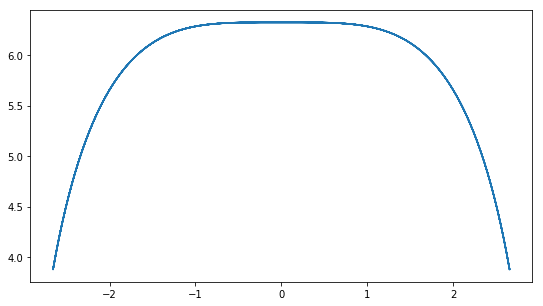

In [73]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,5))
ax.plot(xlist,plist)

Vemos que pareciera existir una especie de limite hasta el cual la trayectoria no puede llegar. De todas formas, no hemos obtenido Warnings al correr nuestro codigo, por lo que pareciera que no hay evaluaciones de funciones que no puedan hacerse.

Lo que podemos intentar ver, es como se comporta cada una de las variables con el tiempo. Es decir, como son las variaciones tanto de $p$ como de $x$ en funcion del tiempo $t$.

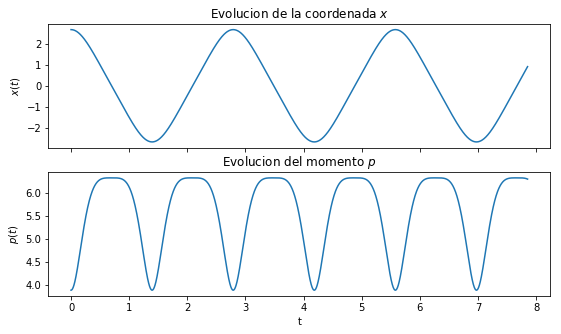

In [74]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(9,5), sharex=True)
ax[0].set_title('Evolucion de la coordenada $x$')
ax[0].plot(tlist,xlist)
ax[0].set_ylabel('$x(t)$')
ax[1].set_title('Evolucion del momento $p$')
ax[1].set_ylabel('$p(t)$')
ax[1].set_xlabel('t')
ax[1].plot(tlist,plist)

A partir de las evoluciones temporales de la coordenada $x$  y el momento asociado $p$, podemos ver que claramente que los periodos de oscilacion para ambas variables coinciden, y que ademas estas nunca se cortan. Es decir, la evolucion temporal pareciera ser continua, con lo cual aqui estamos viendo todos los valores que pueden tomar tanto $x$ como $p$ durante su periodo de evolucion.

Tanto $x$ como $p$ varian entre dos valores fijos, siendo que $p$ toma siempre valores positivos (recordemos que como condicion inicial hemos elejido el valor positivo de la raiz cuadrada al resolver el hamiltoniano con $h$ y el $x_{0}$), y no pareciera que la rama negativa de los $p$ sea parte de la trayectoria. 

Utilizemos ahora el codigo anterior para obtener las trayectorias aproximadas para distintos valores de la energia.

In [75]:
def trayectoria_oscilador_cuartico_aprox(h, tini, tstop, n=3, rama=1):
    """
    Descripcion:
    esta funcion calcula la trayectoria del oscilador cuartico
    para un valor definido de la energia, utilizando la 
    expresion aproximada de las soluciones para el oscilador
    cuartico
    
    Parametros:
    ----------
    h: float,
        valor de la energia para la trayectoria
    tini: float,
        tiempo inicial para el calculo de la trayectoria
    tstop: float,
        tiempo final para el calculo de la trayectoria
    n: entero,
        el grado de aproximacion de la solucion para la coordenada
    rama: entero (1 o -1)
        define si usar la rama negativa o la positiva
        
    Retorna:
    -------
    tlist, xlist, plist: np.arrays,
        arrays con los valores del tiempo, la coordenada x y el 
        momento p de la trayectoria.
    """

    tlist = [tini]
    # valores iniciales
    x_ini = oscilador_cuartico_aprox(h,tini, n=n)
    xlist = [x_ini]
    p_ini = rama*np.sqrt(2.0*(h-x_ini**4/4.0))
    plist = [p_ini]

    # pasos de tiempo
    deltat = np.pi/1000.0
    time = tini
    while time < tstop:
        # para que termine justo en t = tstop
        delt = min(deltat, tstop-time)
        # aumentamos el tiempo en delt
        time = time + delt

        # calculamos el valor de x
        x = oscilador_cuartico_aprox(h, time, n=n)

        # calculamos el p a partir del hamiltoniano y la energia
        p = rama*np.sqrt(2.0*(h-x**4/4.0))

        # agregamos los valores de tiempo, x y p a las listas
        tlist.append(time)
        xlist.append(x)
        plist.append(p)

    # pasamos todo a arrays de numpy para poder trabajar mejor
    tlist = np.asarray(tlist)
    xlist = np.asarray(xlist)
    plist = np.asarray(plist)
    
    return tlist, xlist, plist

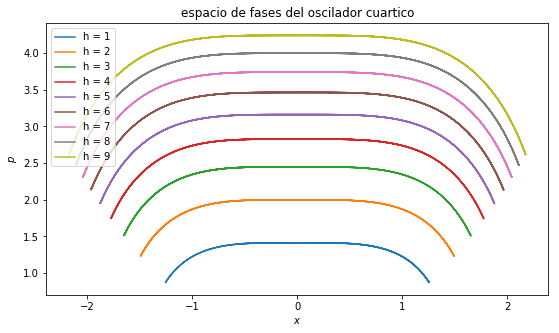

In [76]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,5))

for h in range(1,10):
    t, x, p = trayectoria_oscilador_cuartico_aprox(h, 0, 5*np.pi/2)
    ax.plot(x, p, label='h = '+str(h))
    
ax.set_title('espacio de fases del oscilador cuartico')
ax.set_ylabel('$p$')
ax.set_xlabel('$x$')
ax.legend()

Podemos ahora intentar graficar las partes negativas en $p$ de las tayectorias, de la misma forma que hicimos antes y con los mismos valores de la energia $h$.

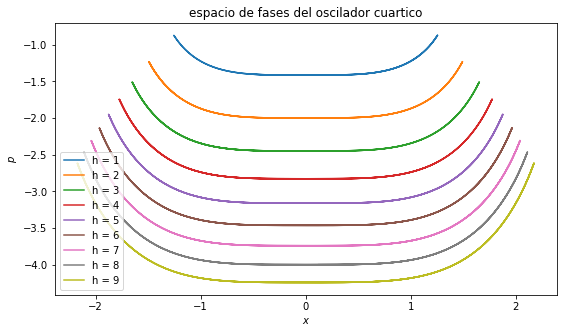

In [77]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,5))

for h in range(1,10):
    t, x, p = trayectoria_oscilador_cuartico_aprox(h, 0, 5*np.pi/2, rama=-1)
    ax.plot(x, p, label='h = '+str(h))
    
ax.set_title('espacio de fases del oscilador cuartico')
ax.set_ylabel('$p$')
ax.set_xlabel('$x$')
ax.legend()

Esto es, tenemos practicamente el mismo grafico que anteriormente, pero simetrico respecto al eje $p=0$. De todas formas esta claro que la limitacion a la hora de inspeccionar toda la trayectoria para un dado valor de la energia proviene de la aproximacion que estamos usando para las soluciones del oscilador cuartico.

Intentaremos ahora ver que ocurre si utilizamos mayor numero de terminos en la expresion aproximada para la solucion del oscilador cuartico.

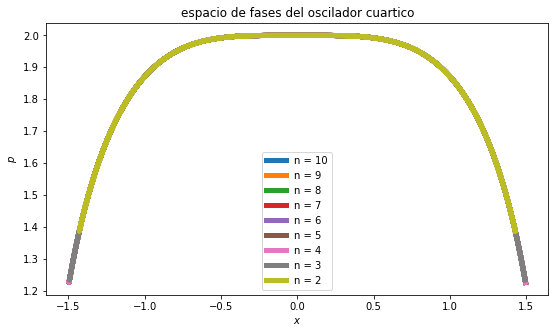

In [82]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,5))

h = 2.0
for n in range(10,1,-1):
    t, x, p = trayectoria_oscilador_cuartico_aprox(h, 0, 5*np.pi/2, n=n)
    ax.plot(x, p, label='n = '+str(n), linewidth=5)
    
ax.set_title('espacio de fases del oscilador cuartico')
ax.set_ylabel('$p$')
ax.set_xlabel('$x$')
ax.legend()

vemos que claramente a medida que utilizamos mas terminos para aproximar a las soluciones del oscilador, este va cerrando mas su trayectoria. De todas formas pareciera que con $n=3$ o $n=4$ ya practicamente no hay mucho cambio en las trayectorias.

Intentemos graficar nuevamente pero haciendo un zoom en una de las regiones donde las trayectorias parecen cortarse, para intentar ver  si las sucecivas aproximaciones mejoran la aproximacion.

(1.2, 1.3)

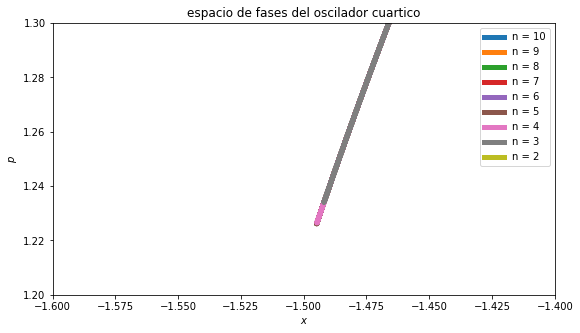

In [83]:
ig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,5))

h = 2.0
for n in range(10,1,-1):
    t, x, p = trayectoria_oscilador_cuartico_aprox(h, 0, 5*np.pi/2, n=n)
    ax.plot(x, p, label='n = '+str(n), linewidth=5)
    
ax.set_title('espacio de fases del oscilador cuartico')
ax.set_ylabel('$p$')
ax.set_xlabel('$x$')
ax.legend()

ax.set_xlim(-1.6,-1.4)
ax.set_ylim(1.2,1.3)

aqui podemos ver que entre $n=3$ y $n=4$ existe una diferencia, y hasta quizas una pequena punta marron (trayectoria usando $n=5$) pareciera mejorar al menos un poco la trayectoria. De todas formas es interesante observar que los sucesivos terminos que podemos ir agregando a la aproximacion no generan un cambio sustancial en la misma.

Podemos ahora intentar resolver el oscilador cuartico utilizando la maquinaria del ejercicio anterior en la cual integramos las ecuaciones de la dinamica del pendulo simple. 

Para ello vamos a recurrir a las mismas librerias y funciones que usamos antes, teniendo cuidado de modificar adecuadamente las derivadas que queremos integrar. Sabemos que el hamiltoniano es:

$$H(p,x) = \frac{p^{2}}{2} + \frac{x^{4}}{4}$$

con lo que en este caso del oscilador cuartico seran, las ecuaciones de movimiento a partir del hamiltoniano se obtienen como:

$\begin{align*}
&\dot{x} = \frac{\partial H}{\partial p}  = p,\\
&\dot{p} = -\frac{\partial H}{\partial x} = -x^{3}.
\end{align*}$

Asi definimos entonces la funcion ```ec_mov_oscilador_cuartico```, asi como antes teniamos ```ec_mov_pendulo_simple```:

In [84]:
def ec_mov_oscilador_cuartico(y, t=0):
    """
    Descripcion:
    Esta función es la encargada de calcular las derivadas tanto de
    la coordenada x como del momento p como funcion del tiempo, para
    determinados valores de p y x para el oscilador cuartico.
    
    Parametros:
    ----------
    y: ndarray,
        array de dimension 1 y longitud 2, con los valores actuales de q y p,
        primero x y luego p.
    t: float (opcional, toma el valor 0.0 por defecto),
        tiempo en el cual se evaluan las derivadas
    
    Retorna:
    -------
    dy: ndarray,
        array de dimension 1 y longitud 2, con los valores de las derivadas
        de q y de p respecto del tiempo, primero dq/dt y luego dp/dt.
    """
    
    # llamamos a las cosas por su nombre!
    x = y[0]
    p = y[1]
    
    # calculamos las derivadas respecto al tiempo
    xdot = p
    pdot = -x*x*x
    
    # asignamos las derivadas calculadas al array de salida
    dy = np.array([xdot, pdot])
    
    return dy

Para la integración de las ecuaciones de movimiento definimos las condiciones iniciales a través de definir el nivel de $h$ y la coordenada inicial $x_{0}$ y luego despejar $p_{0}$ de la ecuación Hamiltoniana.

In [86]:
# importamos la libreria scipy.integrate para integrar sistemas de ecuaciones diferenciales
from scipy import integrate
# importamos una libreria que nos permite seleccionar valores aleatorios
import random

h = 2.0

xlim = np.sqrt(np.sqrt(4.0*h))

# guardamos ambos valores en una lista
xminxmax = [-xlim, xlim]
# para asegurarnos que el primer valor sea el negativo y el segundo el positivo, 
# ordenamos la lista de menor a mayor
xminxmax.sort()
# seleccionamos un valor de q aleatorio entre los valores limite
x0 = random.uniform(xminxmax[0], xminxmax[1])

# calculamos el valor de p despejado del hamiltoniano
# en principio solo guardamos uno de los dos posibles valores
# de p (el negativo).
p0 = -np.sqrt(2.0*h - x0**4/4.0)

# guardamos los valores iniciales en un array inicial
# con la misma forma que necesitamos para llamar a la 
# funcion de las ecuaciones de movimiento:
y0 = np.array([x0, p0])

# integramos en un rango de tiempos 
Ntiempos = 1000
t = np.linspace(0, 10*np.pi, Ntiempos)

# llamamos a la funcion que integra
y, infodict = integrate.odeint(ec_mov_oscilador_cuartico, y0, t, full_output=True, rtol=1.0e-14)
print(infodict['message'])

# recuperamos las variables p, q
x, p = y.T

Integration successful.


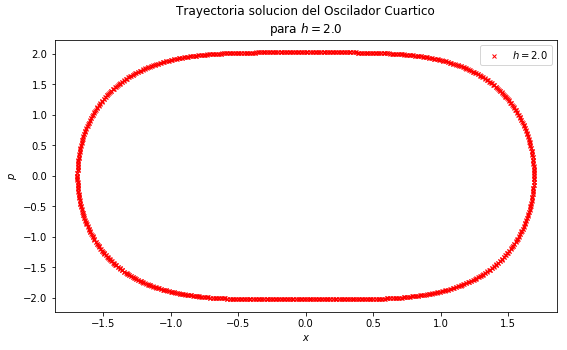

In [88]:
# grafiquemos la situcion:
# definimos el lugar donde vamos a graficar 
# (un solo grafico, nrows=1, ncols=1, y el tamaño del lienzo)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,5))

# graficamos la solucion
ax.plot(x, p, 'rx', markersize=3.5, label='$h = $'+'%3.1f'%h)

# vamos a agregar algunas cuestiones de estilo al grafico
# etiqueta del eje x
ax.set_xlabel('$x$')
# etiqueta del eje y
ax.set_ylabel('$p$')
# titulo
ax.set_title('Trayectoria solucion del Oscilador Cuartico\npara $h = $'+'%3.1f'%h)
# print legend
ax.legend()

plt.show()

En este caso vemos que la trayectoria "real" del oscilador cuartico para un determinado valor de la energia es cerrada. Ademas es claro que en una misma trayectoria se recorren los valores tanto positivos como negativos del momento $p$. 

veamos entonces como hacer para graficar el espacio de fases "real" del Oscilador Cuartico, para varios valores de la energia

In [93]:
def solucion_oscilador_cuartico(h, N=1000, tfinal=2*np.pi):
    """
    Descripcion
    esta funcion devuelve la solucion al problema hamiltoniano
    del oscilador cuartico, a partir de la integracion numerica
    de las ecuaciones de movimiento obtenidas a partir del
    hamiltoniano.
    
    Parametros:
    ----------
    h: float,
        valor de la energia para calcular la trayectoria en el plano p,q.
    N: int (opcional, toma el valor 1000 por defecto),
        numero de puntos donde evaluar la trayectoria.
    tfinal: float,
        tiempo final de la integracion
        
    Retorna:
    -------
    sol: ndarray,
        matriz de Nx2, donde N es la cantidad de puntos donde evaluar la
        trayectoria y el 2 corresponde a una columna para q y otra para p.
    """
    
    # importamos la libreria scipy.integrate para integrar sistemas de ecuaciones diferenciales
    from scipy import integrate
    # importamos una libreria que nos permite seleccionar valores aleatorios
    import random

    xlim = np.sqrt(np.sqrt(4.0*h))

    # guardamos ambos valores en una lista
    xminxmax = [-xlim, xlim]
    # para asegurarnos que el primer valor sea el negativo y el segundo el positivo, 
    # ordenamos la lista de menor a mayor
    xminxmax.sort()
    # seleccionamos un valor de q aleatorio entre los valores limite
    x0 = random.uniform(xminxmax[0], xminxmax[1])

    # calculamos el valor de p despejado del hamiltoniano
    # en principio solo guardamos uno de los dos posibles valores
    # de p (el negativo).
    p0 = -np.sqrt(2.0*h - x0**4/4.0)

    # guardamos los valores iniciales en un array inicial
    # con la misma forma que necesitamos para llamar a la 
    # funcion de las ecuaciones de movimiento:
    y0 = np.array([x0, p0])

    # integramos en un rango de tiempos 
    Ntiempos = N
    t = np.linspace(0, tfinal, Ntiempos)

    # llamamos a la funcion que integra
    y, infodict = integrate.odeint(ec_mov_oscilador_cuartico, y0, t, full_output=True, rtol=1.0e-14)
    print(infodict['message'])

    # recuperamos las variables p, x
    x, p = y.T
    
    # armamos el array completo para retornar
    sol = np.ndarray((2,len(x)))
    
    sol[0][:] = x
    sol[1][:] = p
    
    return sol

Integration successful.
Integration successful.
Integration successful.
Integration successful.
Integration successful.
Integration successful.
Integration successful.
Integration successful.
Integration successful.
Integration successful.


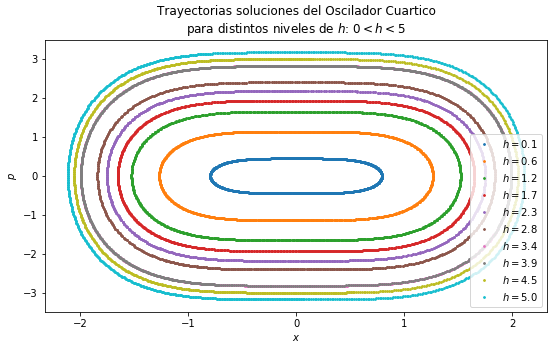

In [98]:
# grafiquemos la situcion:
# definimos el lugar donde vamos a graficar 
# (un solo grafico, nrows=1, ncols=1, y el tamaño del lienzo)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(9,5))

# creamos un array con todos los valores de h que vamos a usar
N_h = 10
h_list = np.linspace(0.1, 5, N_h)
for h in h_list:
    sol = solucion_oscilador_cuartico(h, N=1000, tfinal=abs(8*np.pi/h))
    ax.plot(sol[0], sol[1], '.', markersize=3.5, label='$h = $'+'%3.1f'%h)

# vamos a agregar algunas cuestiones de estilo al grafico
# etiqueta del eje x
ax.set_xlabel('$x$')
# etiqueta del eje y
ax.set_ylabel('$p$')
# titulo
ax.set_title('Trayectorias soluciones del Oscilador Cuartico\npara distintos niveles de $h$: $0<h<5$')
# print legend
ax.legend()

plt.show()

Ahora si tenemos mapeado de forma correcta el espacio de fases del oscilador cuartico, al menos para un numero interesante de valores de la energia. Las trayectorias son cerradas, y podemos ver que no parecieran existir mas que un solo punto fijo (a diferencia del pendulo simple). Tampoco pareciera haber un cambio de regimen entre oscilaciones y rotaciones.

#### Ejercicio 2:
Mostrar que 
$$\frac{\alpha_{n+1}}{\alpha_{n}} \approx e^{-\pi}\approx \frac{1}{23}.$$

#### Resolución Ejercicio 2:
Sabemos que el Hamiltoniano del oscilador cuartico tiene la forma

$$H(p,x) = \frac{p^{2}}{2} + \frac{x^{4}}{4}; \quad p,x \in \mathcal{R}$$

y que admite como soluciones para la coordenada $x$ una expresion en serie de la forma

$$x(t) = x_{0}(h) \sum_{n=1}^{\infty} \alpha_{n} \cos \left( (2n-1)\sqrt{2}\beta h^{1/4}t \right),$$

donde

$$x_{0} = 4\beta h^{1/4}, \quad \beta = \frac{\pi}{2K(1/\sqrt{2})}, \quad \alpha_{n} = \frac{1}{\cosh ((n-1/2)\pi)},$$

con $h$ el valor de la energia.

Analicemos entonces el cociente de dos coeficientes sucesivos de la serie que aparece en la solucion para la coordenada $x$:

$\begin{align*}
&\frac{\alpha_{n+1}}{\alpha_{n}} = \frac{e^{-\pi(n-1/2)} + e^{\pi(n-1/2)}}{e^{-\pi(n+1/2)} + e^{\pi(n+1/2)}}  = \frac{e^{-n\pi}e^{\pi/2} + e^{n\pi}e^{-\pi/2}}{e^{-n\pi}e^{-\pi/2} + e^{n\pi}e^{\pi/2}} = \frac{e^{n\pi}\left[ e^{-2n\pi}e^{\pi/2} + e^{-\pi/2} \right]}{e^{n\pi}\left[ e^{-2n\pi}e^{-\pi/2} + e^{\pi/2} \right]} = \\
&\frac{e^{-2n\pi}e^{\pi/2} + e^{-\pi/2}}{e^{-2n\pi}e^{-\pi/2} + e^{\pi/2}}
\end{align*}$

tomando n grandes, el termino $e^{-2n\pi}$ se hace despreciable, con lo cual el cociente tendera a la fraccion

$\begin{align*}
&\lim_{n\to \infty}\frac{\alpha_{n+1}}{\alpha_{n}} = \lim_{n\to \infty}\frac{e^{-2n\pi}e^{\pi/2} + e^{-\pi/2}}{e^{-2n\pi}e^{-\pi/2} + e^{\pi/2}} \approx \frac{e^{-\pi/2}}{e^{\pi/2}} = e^{-\pi}
\end{align*}$

Es decir que los terminos sucesivos decaen con el factor $e^{-\pi}$, que es aproximadamente $\frac{1}{23}$, con lo cual cada termino de la serie es aproximadamente un factor 23 mas chico que el anterior.

Esta es la razon por la cual cuando usamos la expresion aproximada (truncando la serie a un n finito) para estudiar las trayectorias en el espacio de fases, no obteniamos mucha diferencia a partir de cierto $n$ cuando agregabamos mas terminos en la aproximacion de las soluciones.

#### Ejercicio 3:
Estimar el valor numerico de $\beta$, $\alpha_{1}$ y considerando el resultado anterior, justificar que hasta $\mathcal{O}(1/23)$ la solucion para $x(t)$ se puede escribir como:

$$x(t) = a(h)\cos(\omega (h) t) = a(h)\cos\theta, \quad \theta \in S^{1}$$

donde $a$ es la amplitud de oscilacion

$$a = \sqrt{2} h^{1/4}$$

y $\theta$ es la variable angulo conjugada a la accion $I$. Discutir las semejanzas y diferencias con un oscilador armonico.

#### Resolución Ejercicio 3:
empecemos escribiendo la solucion para el oscilador cuartico por extension, mostrando solamente los primeros terminos de la serie

$\begin{align*}
&x(t) = x_{0}(h) \left[ \alpha_{1}\cos\left(\sqrt{2}\beta h^{1/4}t\right) + \alpha_{2}\cos\left(3\sqrt{2}\beta h^{1/4}t \right) + ... \right] 
\end{align*}$

si dividimos todo por $\alpha_{1}$ nos queda

$\begin{align*}
&\frac{x(t)}{\alpha_{1}} = x_{0}(h) \left[ \cos\left(\sqrt{2}\beta h^{1/4}t\right) + \frac{\alpha_{2}}{\alpha_{1}}\cos\left(3\sqrt{2}\beta h^{1/4}t \right) + ... \right] 
\end{align*}$

de modo que utilizando el resultado del ejercicio anterior, podemos decir que como $\alpha_{n+1}/\alpha_{n} \approx \frac{1}{23}$, a orden $\mathcal{O}(1/23)$ vale la igualdad:

$\begin{align*}
&\frac{x(t)}{\alpha_{1}} = x_{0}(h) \cos\left(\sqrt{2}\beta h^{1/4}t\right),
\end{align*}$

que implica que la solucion $x(t)$ a ese orden la podemos escribir como

$\begin{align*}
&x(t) = x_{0}(h) \alpha_{1} \cos\left(\sqrt{2}\beta h^{1/4}t\right).
\end{align*}$

Llamando $\omega (h) = \sqrt{2}\beta h^{1/4}$ y reemplazando $x_{0} (h) = 4\beta h^{1/4}$ obtenemos a orden $\mathcal{O}(1/23)$:

$\begin{align*}
&x(t) = 4\beta \alpha_{1} h ^{1/4} \cos \left( \omega(h)t\right).
\end{align*}$

Para calcular numericamente los valores de $\beta$ y $\alpha_{1}$ tenemos que evaluar la funcion eliptica completa de primera especie . De modo que vamos a utilizar la misma libreria que utilizamos en practicas anteriores.

In [108]:
from scipy import special

s      = 1.0/np.sqrt(2)
kvalue = special.ellipk(s)

beta   = np.pi/(kvalue*2.0)
alfa1  = 1.0/np.cosh(-np.pi/2.0)

print('###########################')
print('Valores de beta y alpha1 obtenidos numericamente')
print('')
print("beta =", beta)
print("alpha1 =", alfa1)

###########################
Valores de beta y alpha1 obtenidos numericamente

beta = 0.7530278680666778
alpha1 = 0.3985368153383867


Podemos estimar numericamente el valor de $4\beta\alpha_{1}$ y lo comparamos con el valore de $\sqrt{2}$

In [107]:
print('##########################')
print('Valor del factor delante de la solucion')
print(4.0*beta*alfa1)
print(np.sqrt(2))

##########################
Valor del factor delante de la solucion
1.2004373136013944
1.4142135623730951


Es decir que de alguna forma no estamos tan lejos al aproximar $4\beta\alpha_{1}$ con $\sqrt{2}$. De esta forma podemos escribir a orden $\mathcal{O}(1/23)$

$$x(t) \approx \sqrt{2} h^{1/4} \cos \left( \omega (h) \right)$$

Es decir que en primera aproximacion, el oscilador cuartico pareciera tener un comportamiento similar al del oscilador armonico.

En este sentido, el oscilador cuartico solamente pude tener oscilaciones, asi como el oscilador armonico. Sin embargo existe una dierencia sustancial respecto del oscilador armonico y es que tanto la amplitud como la frecuencia de oscilacion para el oscilador cuartico aproximado dependen de la energia, lo que los hace fundamentalmente no lineales.

#### Ejercicio 4:
A partir de la expresion de la frecuencia
$$\omega (h) = \sqrt{2} \beta h^{1/4}$$
utilizando la relacion
$$\omega (h) = \frac{\mathrm{d}h}{\mathrm{d} I}$$
mostrar que el Hamiltoniano se puede escribir en terminos de la accion como
$$H(I) = AI^{4/3}, \quad A=\left( \frac{3\beta}{4\sqrt{2}} \right)^{4/3}$$

#### Resolución Ejercicio 4:
$\begin{align*}
&\omega (h) = \sqrt{2} \beta h^{1/4}, \\
&\frac{\mathrm{d}h}{\mathrm{d}I} = \omega (h) \to \frac{\mathrm{d}h}{\omega (h)} = \mathrm{d}I,
\end{align*}$

de esta ultima ecuacion, reemaplzando la expresion para la frecuencia $\omega$ como funcion de la energia $h$, se obtiene

$\begin{align*}
&\sqrt{2}\beta \mathrm{d}I = h^{-1/4}\mathrm{d}h,
\end{align*}$

integrando esta ecuacion obtenemos

$\begin{align*}
&\sqrt{2}\beta I = \frac{4}{3}h^{3/4}
\end{align*}$

y como el Hamiltoniano es siempre igual al valor de la energia, podemos igualar $H(I) = h$, con lo cual tenemos

$\begin{align*}
&H(I) = \left( \frac{3\beta}{2\sqrt{2}} \right)^{4/3} I^{4/3} = A I^{3/4}, 
\end{align*}$

con $A=\left( \frac{3\beta}{2\sqrt{2}} \right)^{4/3}$

#### Ejercicio 5:
Hallar la expresion de la frecuencia en terminos de $I$ y calcular el parametro de no linealidad $\alpha$, definido como

$$\alpha = \frac{I}{\omega}\frac{\mathrm{d}\omega}{\mathrm{d}I}$$

#### Resolución Ejercicio 5:
del ejercicio anterior hemos hallado la expresion del hamiltoniano en funcion de la accion $I$. Por lo que para hallar la frecuencia solamente debemos derivar la funcion hamiltoniana respecto de la accion:

$\begin{align*}
&\omega (I) = \frac{\partial H}{\partial I} = \frac{4}{3}A I^{1/3}
\end{align*}$

Y a partir de la frecuencia, podemos calcular el parametro de no linealidad $\alpha$:

$\begin{align*}
&\alpha = \frac{I}{\omega}\frac{\mathrm{d}\omega}{\mathrm{d}I} = \frac{I}{4/3 A I^{1/3}} 4/3 A I^{-2/3} = \frac{1}{3}
\end{align*}$